# K-Nearest-Neighbors

#### What type of data is suitable for performing KNN algorithm?

K Nearest Neighbor (KNN) is a machine learning approach that is both basic and versatile. It's utilized in a wide range of applications, including handwriting recognition, picture recognition, and video recognition. When labeled data is too expensive or impossible to gather, KNN comes in handy, because it can solve a wide range of prediction problems with high accuracy.

KNN is a simple algorithm that uses the target function's local minimum to learn an unknown function with the appropriate precision and accuracy. The program also determines the location of an unknown input, as well as its range and distance from it. It works on the notion of "knowledge gain," in which the algorithm determines which method is best for predicting an unknown number.

#### In which situations, can we conduct this algorithm?

Because it is a lazy learning algorithm, it does not require any prior training before providing real-time predictions. This makes the KNN algorithm much faster than other training-based algorithms like SVM, linear regression, and so forth. So, when there is even less trainig data, we can still use KNN algorithm to get predictions. Even like classifying on common intrest sharing observations data will have better results with KNN.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
def map(df):
    ax = sns.heatmap(df, annot=True, cmap='Blues')
    ax.set_title('Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

Dataset we are considering to understand the algorith is pima indians diabetes dataset.
source: https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset/blob/master/diabetes.csv

In [3]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


This dataset classifys whether a particular person has diabetes(outcome as lable)  with respect to these attributes/features like glucose, Insulin, BMI, blood pressure, etc., readings. This is a classification problem and it has labels so, this is a supervised learning problem.

- As there are less number of observations, we can select KNN algorithm to classify this data.
- Also, there is high possibility to persons to share common feature values to be in a similar class. This is also considerable to use KNN.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


As we see the dataset is already mostly clean and there are no null/NaN values. Let us see statistical data of the dataset.

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


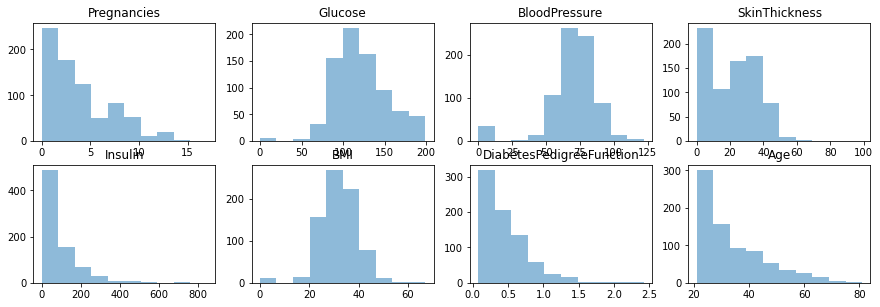

In [6]:
col = list(data.columns)[:-1]
plt.figure(figsize=(15, 10))
for x in range(1,len(col)+1):
    plt.subplot(4,4,x)
    plt.hist(data[col[x-1]], alpha = 0.5)
    plt.title(col[x-1])
    plt.plot()

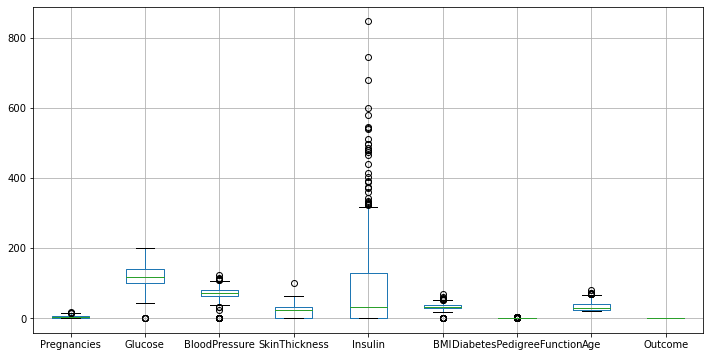

In [7]:
plt.figure(figsize=(12, 6))
data.boxplot()

We can see the data is not sparse and all features have different stats or do not share same range values. There is a scalability issue. As the distance is computed to the K values in the neighborhood, which is a clear influencing factor for KNN algorithms.

In [8]:
data1 = data.copy()
y = data1['Outcome']
data1.drop(columns = 'Outcome', inplace = True)
X = data1

Taking 80-20 split for training and testing data.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

Because the KNN algorithm is based on Euclidean Distance, it is necessary to scale all variables before running it. KNN is very sensitive to scale from this perspective.

In [10]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
X_train

array([[-1.13297401, -1.70544954,  0.3837674 , ...,  1.63727815,
        -0.83696713,  1.09138367],
       [-0.83670227, -1.29149491, -0.6919493 , ..., -1.55372817,
        -0.6446041 , -1.0400081 ],
       [-0.54043053, -0.4954283 ,  0.33254279, ..., -1.04219281,
         0.26310891,  1.68817336],
       ...,
       [ 0.64465642, -0.43174297,  0.99846265, ...,  0.60202801,
         0.76505617, -0.18745139],
       [-0.54043053, -1.45070823, -0.23092786, ..., -0.26271035,
        -0.30796881, -0.01694005],
       [-0.54043053, -0.43174297,  0.28131819, ...,  0.21228678,
        -0.20577596, -0.86949676]])

KNN classifier from sklearn library to fit/train the model. 

In [11]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = model.predict(X_test)

In [13]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.8175895765472313
Test set Accuracy:  0.7337662337662337


[[85 17]
 [24 28]]


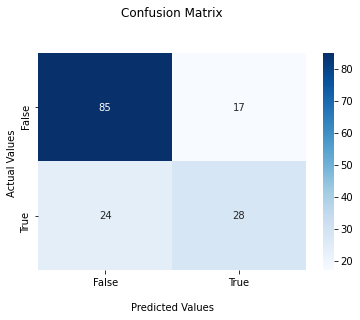

In [14]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
map(cf_matrix)

We know, in for KNN algorithm we have to give k value and we do not know exactly which would be perfect k value or which k value will give more accuracy while testing model. So, we will try a certain number of k values and check there accuracies and will proceed with specific k-value which has the best accuracy.

In [15]:
K = 10
error = []
mean_accuracy = np.zeros((K-1))
std_accuracy = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):
    #Train Model and Predict  
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = model.predict(X_test)
    mean_accuracy[n-1] = metrics.accuracy_score(y_test, yhat)
    std_accuracy[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    error.append(np.mean(yhat != y_test))
mean_accuracy

array([0.68831169, 0.71428571, 0.74675325, 0.74025974, 0.73376623,
       0.74025974, 0.75324675, 0.74025974, 0.75974026])

we can see here the k-value = 9 has best accuracy so, it is suggested to use k=9 for KNN algorithm inorder classify the new data.

In [16]:
error

[0.3116883116883117,
 0.2857142857142857,
 0.2532467532467532,
 0.2597402597402597,
 0.2662337662337662,
 0.2597402597402597,
 0.24675324675324675,
 0.2597402597402597,
 0.24025974025974026]

we can see here the k-value = 9 has less error rate.

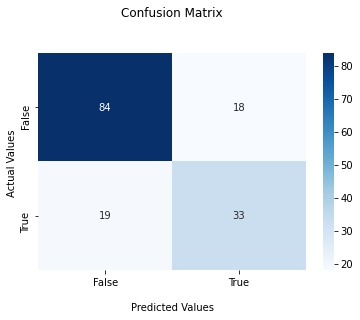

In [17]:
conf_matrix = confusion_matrix(y_test, yhat) #for k =9
map(conf_matrix)

Graphical plot representation of accuracy attained by different k-values.

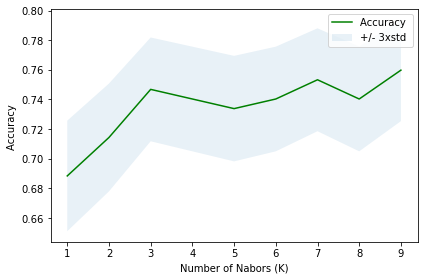

In [18]:
plt.plot(range(1,K),mean_accuracy,'g')
plt.fill_between(range(1,K),mean_accuracy - 1 * std_accuracy,mean_accuracy + 1 * std_accuracy, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

Graphical plot representation of mean-errors attained by different k-values.

Text(0, 0.5, 'Mean Error')

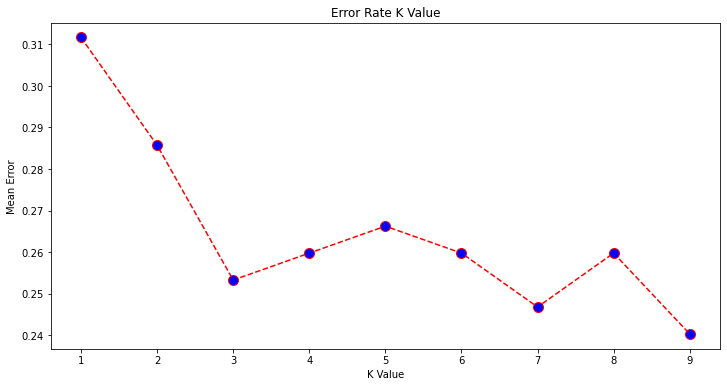

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, K), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

As the k values decrease the error rate also has a downfall in this plot and at k = 9, there is least error value.

Reference:
- https://neptune.ai/blog/knn-algorithm-explanation-opportunities-limitations#:~:text=KNN%20is%20most%20useful%20when,of%20desired%20precision%20and%20accuracy.
- https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
- https://uncg.instructure.com/courses/100793/files/9953361?wrap=1
- https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/